# Introduction

This tutorial has a few aims: first, to explain to you how to work with geographical features using GeoJSON data sets and second, to show you how to use GeoPandas, using both GeoJSON formated data and GeoDataFrames, in order to analyze transmission line properties and energy poverty in Sub Saharan Africa. 

Previously, GeoJSON has been used in a variety of ways from creating physical representations of objects in the real world to intangible applications like mobile routing. GeoJSON is unique in that it uses JavaScript Object Notation (JSON) and because of its simplicity. GeoJSON objects can be the following: 1) Geometry (a region of space), 2) Feature (a spatially bounded entity), or a 3) Feature Collection (list of features). We will go through each of these objects in more detail in this tutorial.  

To understand the first goal of this tutorial, here is a GeoJSON encoded map that highlights all of the states in the United States, using GeoJSONio to visualize the map. You might notice something interesting about the GeoJSON formated code on the right side of the image: the format looks like a JSON file but seems to recognize geographical features such as the Polygon (see this as the value for the third `type` key). 

![title](https://s3.amazonaws.com/com.twilio.prod.twilio-docs/original_images/Y_xXJK8b0UtJFs2VkmFtBWySrMCUNsiChC1BWKRtMtmCDnMESP2GeKMfXBxrqlgmI66VhP3Y34.png)

The map above showcases one of the most exciting parts of GeoJSON: the ability to construct shapes defined by a set of coordinates. Here, you can see that each state is defined as a Polygon with a set of coordinates (see this under the `geometry` key). More on this later. After going through this tutorial, you will be able to construct all kinds of objects in geographical space using this library! 

# Content

This tutorial will start you off with the basics of the GeoJSON format and then walk you through a few examples of what can be done with GeoJSON formatted data. 

We will first use data from the World Bank on the existing electricity grid system in Africa to demostrate real world applications of this library. At the end of the tutorial, we will use city population data from the World Cities Datebase to add additional analysis to our real world application of energy poverty in Sub Saharan Africa.

The following list should give you a clear idea of what this tutorial will contain:

1. Installing the Required Libraries
2. The Basics of GeoJSON (Geometry, Feature, Feature Collection)
3. Setting Up Data For Real World Applications
4. Real World Application 1: Country Specific Properties with GeoJSON
5. Real World Application 2: Voltage Analysis with GeoPandas
6. Real World Application 3: Plotting with GeoPandas
7. Summary and References

# Installing the Relevant Libraries

This tutorial will use a variety of libraries. You can install GeoJSON, GeoJSONio and GeoPandas in addition to other libraries you have not yet installed via the terminal using the following command format: 

> `pip3 install` + name of library

For example, `pip3 install geojsonio` . It is possible that you will have to install these libraries in a different way specific to your machine. For more information on how to install each library, please refer to the Summary and References section which contains links to additional information on each library.

The libraries required for this tutorial include: 

1. GeoJSON
2. GeoJSONio
3. GeoPandas
4. Matplotlib
5. JSON
6. Pandas
7. Shapely

Now that the required packages are installed, we need to import them. 

In [1]:
import geojson
import geojsonio
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd

from geopandas import GeoDataFrame
from shapely.geometry import Point

# The Basics

Before we load the data used in this tutorial, we need to go over some basics. The first elements of a GeoJSON object are **Coordinates**, typically  longitude and lattitude, sometimes with an added elevation component. Once these coordinates are placed in the correct order, the array is called a **Position**. The correct order of a Position is the following: 

$$[longitude, latitude, elevation]$$


Notice that longitude is first instead of latitude, which is traditionally first. The reason for this ordering is based in x-y plane geometry. Because the x axis component is the one represented first in mathematices, the x component of a geospatial object, or the longitude, should be represented first. Now that you understand the most simple components of GeoJSON objects, let's get into how to use these Positions to create geospatial objects.

## Geometry

There are seven different types of geometry objects:  

1) Point  
2) Multipoint  
3) LineString   
4) MultiLineString  
5) Polygon   
6) MultiPolygon  
7) GeometryCollection

### The Point & Multipoint

A **Point** consists of one position. For example, 

`[longitude, latitude] = [10,0]`

A **Multipoint**, or multiple Points, allows you to represent disconnected parts of a single entity. For example, if you were trying to represent all the coal plants in Pennsylvania, you could use one Point for each plant. To represent this in GeoJSON, you use an array of Points: 

`[[10,0],[1,2]]`

Let's take a look at what this looks like in code. The most general form of GeoJSON looks like this:
    
    {
        "type": "",
        "coordinates": [,]
    }
    

The value of the "type" key can be: "Point", "MultiPoint", "LineString", "MultiLineString", "Polygon", or "MultiPolygon". Notice, however, that the levels of nesting differ from a single Point to Multipoint. Any of the "Multi" objects have an additional level of nesting. For example, a Point, as previously mentioned, can be represented as:

    {
        "type": "Point",
        "coordinates": [10,0]
    }

So, a MultiPoint is an array of points with an additional level of nesting: 

    {
        "type": "MultiPoint",
        "coordinates": [
            [10,0], [1,2]
        ]
    }

Now, let's construct our own MultiPoint and see what it looks like using GeoJSONio. The `geojsonio.display` command should open a new browser window with the two points displayed on a map with the code on the right side of the window. The resulting map is also displayed below the code for your convenience. You might also notice that the output of the `geojsonio.display` function is the link to view the map. 

In [2]:
MultiPoint_sample = {
    "type": "MultiPoint",
    "coordinates": [
            [-79.99,40.44], [-79.94,40.44]
        ]
}

MultiPoint_sample_map = json.dumps(MultiPoint_sample) 
geojsonio.display(MultiPoint_sample_map)

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22MultiPoint%22%2C%20%22coordinates%22%3A%20%5B%5B-79.99%2C%2040.44%5D%2C%20%5B-79.94%2C%2040.44%5D%5D%7D'

![alt text](Image 1.png "Title")

Looks like one of the points is downtown Pittsburgh and the other is CMU. So that's great— GeoJSON and GeoJSOINio can plot longitude and latitude points. But this is just the beginning! These libraries can do so much more.

### The LineString & MultiLineString

The **LineString**, on the other hand, connects two Points and looks just like the MultiPoint: 

`[[10,0],[1,2]]`

Remember that the way to distinguish a LineString from the Multipoint is through the "type" key in the code. The **MultiLineString** is an array of LineStrings: 

`[[[5,5], [10,17], [19,40], [39,52]]]`

Now, let's check out what a LineString looks like in GeoJSONio.

In [45]:
LineString_sample = {
    "type": "LineString",
    "coordinates": [
            [-79.99,40.44], [-79.94,40.44]
        ]
}

LineString_sample_map = json.dumps(LineString_sample) 
geojsonio.display(LineString_sample_map)

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22LineString%22%2C%20%22coordinates%22%3A%20%5B%5B-79.99%2C%2040.44%5D%2C%20%5B-79.94%2C%2040.44%5D%5D%7D'

![alt text](Image 2.png "Title")

As you can see, we have now connected a line between downtown Pittsburgh and CMU. 

Finally, the last type of geometry is the Polygon and the MultiPolygon.

### The Polygon & MultiPolygon

Unlike the objects previously mentioned, the Polygon has an area, either with or without holes. A **Polygon without a hole** is represented just like LineStrings, but the first and last coordinates must be the same: 

`[[[5,5], [5,10], [10,10], [10,0]]]` 

A **Polygon with a cut out** is just like a bagel— there is an exterior boundary and an interior cut out (the hole). In order to represent a Polygon with a cut out, the first array is the exterior and the second (or more) is the interior cut out: 

`[[[5,5], [5,10], [10,10], [10,0], [5,5]], [[6,4], [8,5], [9,4], [6,4]]]`

A **MultiPolygon** follows the same logic as the MultiPoint and MultiLineString— it is an array of multiple Polygons, with or without holes: 

`[[[[5,5], [5,10], [10,10], [10,0], [5,5]], [[6,4], [8,5], [9,4], [6,4]]], [[[2,4], [5,6], [7,10], [2,4]]]]`

Let's look at a simple Polygon in GeoJSONio as this tutorial will not get into hollow Polygons or MultiPolygons.

In [55]:
Polygon_sample = {
    "type": "Polygon",
    "coordinates": [[
            [-79.946593,40.444395], [-79.943094,40.444566], 
            [-79.938879,40.443822], [-79.937732,40.442659],
            [-79.940366,40.441592], [-79.941576,40.441843],
            [-79.942224,40.440542], [-79.947172,40.441625],
            [-79.948233,40.440962], [-79.949131,40.441366],
            [-79.946593,40.444395]
        ]]
}

Polygon_sample_map = json.dumps(Polygon_sample) 
geojsonio.display(Polygon_sample_map)

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22Polygon%22%2C%20%22coordinates%22%3A%20%5B%5B%5B-79.946593%2C%2040.444395%5D%2C%20%5B-79.943094%2C%2040.444566%5D%2C%20%5B-79.938879%2C%2040.443822%5D%2C%20%5B-79.937732%2C%2040.442659%5D%2C%20%5B-79.940366%2C%2040.441592%5D%2C%20%5B-79.941576%2C%2040.441843%5D%2C%20%5B-79.942224%2C%2040.440542%5D%2C%20%5B-79.947172%2C%2040.441625%5D%2C%20%5B-79.948233%2C%2040.440962%5D%2C%20%5B-79.949131%2C%2040.441366%5D%2C%20%5B-79.946593%2C%2040.444395%5D%5D%5D%7D'

![alt text](Image 3.png "Title")

Amazing! Now you understand how the map that highlighted the U.S. states in the beginning of this tutorial was constructed: Polygons were built for each state. Now, just one last thing about Geometry.

A **GeometryCollection**, used rarely, is utilized when you need to represent something with multiple types of geometries such as a Point and a LineString. You'll see why this is rarely used as we move onto discussing Features.

Here is what a Geometry Collection looks like:

    {
        "type": "GeometryCollection",
        "geometries": [
            {
                "type": "Point",
                "coordinates" : [5,7]
            },
            {
                "type": "LineString",
                "coordinates": [
                    [8,15], [23,34]
                 ]
             }
         ]
    }

Now that we've gone over all the different types of Geometry objects, let's briefly discuss what makes a Feature and a FeatureCollection. This is pretty simple.

## Feature & FeatureCollection

A **Feature** object is just a geometry object with properties:

    {
        "type": "Feature"
        "geometry": {
            "type": "Point",
            "coordinates": [5,7]
         },
         "properties": {
             "name": "null city"
         }
     }
     
A Feature can also encompass a GeometryCollection:

    {
        "type": "Feature"
        "geometry": {
            "type": "GeometryCollection",
            "geometries": [{
                "type": "Point"
                "coordinates": [5,7]
             }, {
               "type": "LineString",
               "coordinates": [[8,15], [23,34]]
             }]
          },
          "properties": {
              "name": "null city"
          }
      }

A **FeatureCollection** is an array of Features:

    {
        "type": "FeatureCollection".
        "features": [
            {
              "type": "Feature",
              "geometry": {
                  "type: "Point",
                  "coordinates": [5,7]
              },
              "properties": {
                  "name" : "null city"
              }
         }, {
              "type": "Feature",
              "geometry": {
                  "type": "LineString",
                  "coordinates": [
                      [8,15], [23,34]
                   ]
               },
               "properties": {
                   "name" : "null road"
               }
         }]
     }
     
You may now realize why a GeometryCollection on its own is rarely used. A GeometryCollection by itself does not include any properties— it is simply geometry objects bunched together. A more popular option is the FeatureCollection, which allows you to put identifying labels on each piece of geometry rather than just bunching them together with no indentity.

Congratulations! You've completed the basics. Let's move onto getting set up for real world applications of GeoJSON datasets.

# Setting Up for Real World Applications

## Loading the Data

1. The first few datasets that we will use in this tutorial are available via the World Bank. We will look specifically at "Africa - Electricity Transmission and Distribution EXISTING only" for the first part of this tutorial, which can be downloaded [here](https://datacatalog.worldbank.org/dataset/africa-electricity-transmission-and-distribution-grid-map-2017) (click on the Data & Resources tab). Please also download "Africa - Electricity Transmission and Distribution PLANNED only" for us to use later on in this tutorial. 

2. From the World Cities Database, download the [basic](https://simplemaps.com/data/world-cities) dataset. We will use this in the last section of the tutorial.

Once you have downloaded these files, save them in the same folder as this Jupyter Notebook. We will begin by importing the EXISTING dataset first using `json.load`:

In [4]:
with open('africagrid20170906existing.geojson') as f:
    grid_exist = json.load(f)

## Understanding the Data

Let's take a look at this dataset by first identifying the keys in the dictionary.

In [5]:
print(grid_exist.keys())

dict_keys(['type', 'crs', 'features'])


It looks like the first level of keys in this dictionary are `type`, `crs` and `features`. `crs` stands for Coordinate Reference System and specifies the type of system the coordinates adhere to. The default is longitutude and latitude (or, more formally, WGS84 datum), as previously discussed.

Great! Just based on intuition, this dataset is probably comprised of multiple features as it represents transmission lines throughout Africa which would be well represented through MultiLineStrings. To confirm, let's take a look at the first 'type' value:

In [6]:
print(grid_exist['type'])

FeatureCollection


Exactly what you would expect! A `FeatureCollection` which represents an array of Features, or perhaps MultiLineStrings with properties. Let's look at the first feature in a little more detail.

In [12]:
for feature in grid_exist['features']:
    geometry = feature['geometry']
print(geometry)

# https://gis.stackexchange.com/questions/73768/converting-geojson-to-python-objects

{'type': 'LineString', 'coordinates': [[44.206345081329346, 15.348341311574252], [42.95931100845336, 14.793492826616989]]}


Now we are seeing the array of Features inside the FeatureCollection. You might notice that the "type" of all these Features are LineStrings even though each contain more than two sets of coordinates, technically making each Feature a MultiLineString. This format will still work even though it's not completely accurate. 

Remember that Features have both a `geometry` component and a `properties` component. We've just looked at the `geometry` component in detail so now let's take a look at the `properties`.

In [13]:
for feature in grid_exist['features']:
    properties = feature['properties']
print(properties)

{'status': 'Existing', 'country': 'Yemen', 'source': 'Arab Union of Electricity and country utilities', 'operator': None, 'from': 'Sanaa', 'to': 'Al Hudaydah', 'voltage_kV': 150.0, 'length_km': '152'}


Wow! There's a lot of great data stored in this `properties` component. For each Feature, we have: 

1) Status   
2) Country  
3) Source  
4) Operator  
5) From  
6) To  
7) Voltage  
8) Length

One of the most interesting properties we have available is the length of tranmission lines. Before we get into country specific analysis, let's look at this property in a little more depth. Let's calculate the total length of transmission lines in this dataset by creating a function.

In [56]:
def length_sum(dataset):
    # Separate the features dictionary into a new dictionary
    features = dataset['features']
    # Count the number of features
    number_entries = (len(features))
    length_sum_list = []
    for i in range(number_entries):
        # Create a list that stores all the of "length_km" values
        length_sum = features[i]['properties']['length_km']            
        length_sum_list.extend(length_sum)
    # Make all entries integers
    length_sum_list = [int(s) for s in length_sum_list]
    total = 0
    # All all the list entries together
    for i in range(0, len(length_sum_list)): 
        total = total + length_sum_list[i] 
    return total   

length_sum(grid_exist)
# The strategy used to add all list entries together is from: https://www.geeksforgeeks.org/python-program-to-find-sum-of-elements-in-list/


69387

It looks like the theres about 70,000 km of transmission lines in the African continent. We will dive a little deeper into this property in the next section.

# Real World Application 1: Country Specific Properties

Let's continue to explore the properties a little bit but with a focus on a particular country. Now, let's revise the `length_sum` function so that we can look at the length of the transmission lines for a particular country. Let's take Rwanda, for example.

In [8]:
def length_country(dataset, country):
    features = dataset['features']
    # Pull out only the features for the specific country 
    country_features = [i for i in features if (i['properties']['country'] == country)] 
    number_entries = (len(country_features))
    length_sum_list = []
    for i in range(number_entries):
        length_sum = country_features[i]['properties']['length_km']            
        length_sum_list.extend(length_sum)
    length_sum_list = [int(s) for s in length_sum_list]
    total = 0
    for i in range(0, len(length_sum_list)): 
        total = total + length_sum_list[i] 
    return total   

length_country(grid_exist, "Rwanda")

229

Amazing! Rwanda has 229 km of existing transmission lines. This may seem like a lot but it actually isn't. We will see this with the next `geojsonio.display` output.

Now that we know the total length of transmission lines in Rwanda, let's look at this transmission system via GeoJSONio. Just like we have seen before, this `geojsonio.display` command will open a new browser window with the features displayed on a map and the resulting output under this function will be the link to view the map. For convenience, the resulting image is displayed under this code.

In [113]:
Rwanda_dict = {
    "type": "FeatureCollection",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } 
           },
    "features": Rwanda_features
}
Rwanda_map = json.dumps(Rwanda_dict) 
geojsonio.display(Rwanda_map)

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22crs%22%3A%20%7B%22type%22%3A%20%22name%22%2C%20%22properties%22%3A%20%7B%22name%22%3A%20%22urn%3Aogc%3Adef%3Acrs%3AOGC%3A1.3%3ACRS84%22%7D%7D%2C%20%22features%22%3A%20%5B%7B%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22status%22%3A%20%22Existing%22%2C%20%22country%22%3A%20%22Rwanda%22%2C%20%22source%22%3A%20%22UGANDA-AERDP%20Final%20Report%20Annex%201%3B%20February%202004%22%2C%20%22operator%22%3A%20null%2C%20%22from%22%3A%20%22KABALE%22%2C%20%22to%22%3A%20%22KATUNA%22%2C%20%22voltage_kV%22%3A%2033.0%2C%20%22length_km%22%3A%20%220%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22LineString%22%2C%20%22coordinates%22%3A%20%5B%5B30.067798686160472%2C%20-1.392966906597394%5D%2C%20%5B30.06930133548832%2C%20-1.395091201497678%5D%5D%7D%7D%2C%20%7B%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22status%22%3A%20%22Existing%22%2C%20%22country%22%3A%20%22Rwanda%22%2

![alt text](Image 4.png "Title")

You can see clearly how there are many regions in Rwanda that are not connected to the national grid. This makes sense as only 34% of the population in Rwanda have access to electricity (see the Electricity Access Reference at the end of this tutorial for more information). Now, just for fun, let's compare this result with a map of Rwanda ([source](http://www.geographicguide.com/africa-maps/rwanda.htm)) to start to think about where these transmission lines start and end. This will help set up our analysis on electricity access that will appear in the last Real Application. 

![alt text](http://www.geographicguide.com/pictures/map-rwanda.jpg)

Do you notice anything interesting? It seems like the transmission lines start and end at either big cities or cities with an airport or airstrip. Let's try to confirm this. The "to" and "from" properties in the dataset seem like they would be helpful. Let's create a function to get a sorted list of the unique `to` and `from` values.

In [47]:
def to_data(dataset, country):
    features = dataset['features']
    country_ = [i for i in features if (i['properties']['country'] == country)] 
    number_entries = (len(country_))
    to_list = []
    for i in range(number_entries):
        # Create a list that has all of the "to" values
        to_it = country_[i]['properties']['to'] 
        to_list.append(to_it)
    # Sort this list
    to_list_sort = sorted(to_list)
    # Get rid of any duplicates
    to_list_sort = list(dict.fromkeys(to_list_sort))
    return to_list_sort  

def from_data(dataset, country):
    features = dataset['features']
    country_ = [i for i in features if (i['properties']['country'] == country)] 
    number_entries = (len(country_))
    from_list = []
    for i in range(number_entries):
        from_it = country_[i]['properties']['from'] 
        from_list.append(from_it)
    # Sort this list and ignore the null values
    from_list_sort = sorted(from_list, key=lambda x: x or '')
    from_list_sort = list(dict.fromkeys(from_list_sort))
    return from_list_sort  

def con_to_from(dataset, country):
    country_to = to_data(dataset, country)
    country_from = from_data(dataset, country)
    # Put the "to" and "from" data into the same list
    country_to_from = country_to + country_from
    country_to_from = sorted(country_to_from, key=lambda x: x or '')
    country_to_from = list(dict.fromkeys(country_to_from))
    return country_to_from

con_to_from(grid_exist, "Rwanda")

# The strategy used for sorting with NoneType entries comes from: https://stackoverflow.com/questions/12971631/sorting-list-by-an-attribute-that-can-be-none
# The strategy used from removing duplicates comes from: https://stackoverflow.com/questions/7961363/removing-duplicates-in-lists

[None,
 'BUJUMBURA',
 'BUKAVU',
 'BUTARE',
 'BYUMBA',
 'CIBITOKE',
 'GATSATA',
 'GATUMBA',
 'GIFURWE',
 'GIHIRAI',
 'GIKONGORO',
 'GISAKURA',
 'GISENYI',
 'IPN',
 'JABANA',
 'KABALE',
 'KABARONDO',
 'KARONGI',
 'KATUNA',
 'KIBOGORA',
 'KIGALI',
 'KIGOMA',
 'KISORO',
 'MASHYUZA',
 'MUKAMURA',
 'MUKUNGWA',
 'MULINDI',
 'MWAGA',
 'NGOMA',
 'NTARUKA',
 'NYAGATARE',
 'NYANZA',
 'RAMBURA',
 'RUHENGERI',
 'RULINDO',
 'RUSIZI I&II',
 'RUTSIRO',
 'RUZIZI I',
 'RUZIZI II',
 'RUZUZI I & II',
 'RWINKWAVU',
 'WISUMO']

Looks like most of the big cities and airport/airstrip containing cities are on that list! Take some time with the two above maps to confirm this. 

And what a handy list to have when analyzing electricity infrastructure in Rwanda. Knowing the starting and ending points allows one to understand who has access to the electricity grid and who does not. Understanding an unconnected person's proximity to the nearest transmission line allows for further analysis on the feasibility of connecting them to the grid. 

# Real World Application 2: Voltage Analysis with GeoPandas

Now that we've looked at the length of transmission lines in detail in addition to the starting and ending points, let's look at some other properties using GeoPandas this time. Let's import our data again, just for practice, using GeoPandas this time.

In [22]:
grid_exist_gp = gpd.read_file("africagrid20170906existing.geojson")
print(grid_exist_gp.head())

     status country  source operator  from    to  voltage_kV length_km  \
0  Existing    Togo  ECREEE     None  None  None       161.0        61   
1  Existing    Togo  ECREEE     None  None  None        63.0         5   
2  Existing    Togo  ECREEE     None  None  None       161.0        18   
3  Existing    Togo  ECREEE     None  None  None       161.0        58   
4  Existing    Togo  ECREEE     None  None  None       161.0        79   

                                            geometry  
0  LINESTRING (1.55338 6.50436, 1.55434 6.50452, ...  
1  LINESTRING (1.13825 9.03338, 1.13916 9.03056, ...  
2  LINESTRING (1.30275 6.16110, 1.30271 6.16160, ...  
3  LINESTRING (1.64036 9.66287, 1.63998 9.66210, ...  
4  LINESTRING (2.03319 7.18600, 2.03282 7.18608, ...  


Now we are seeing our data as a GeoDataFrame which allows us to do additional manipulation. You'll notice that once the GeoJSON data set was imported using GeoPandas, each `key` in the GeoJSON dictionary becomes its own column. Let's do a little more exploration of the properties in this dataset now that they are nicely put into their own columns. We will look specifically at the `voltage_kV` property and find the average value for each country.

In [17]:
# Make sure the "voltage_kV" column is in a numeric format
grid_exist_gp['voltage_kV'] = grid_exist_gp['voltage_kV'].astype(float)
# Find the average "voltage_kV" value for each country
country_volt_exist = grid_exist_gp.groupby(['country'])['voltage_kV'].mean()
print(country_volt_exist)

country
Algeria                             376.136364
Angola                              115.131579
Benin                               137.078947
Botswana                            121.529412
Burkina Faso                         56.174312
Burundi                              38.604651
Cameroon                             38.348624
Central African Republic             60.000000
Chad                                  0.000000
Democratic Republic of the Congo    343.717514
Djibouti                            230.000000
Egypt                               414.655172
Equatorial Guinea                     0.000000
Eritrea                              75.428571
Ethiopia                            183.689076
Gabon                                69.250000
Gambia                               30.000000
Ghana                               111.070370
Guinea                               97.972973
Iraq                                380.769231
Ivory Coast                         145.227273
Jorda

It looks like there is a lot of variation between countries. Some summary statistics might be helpful here to get a better idea of how voltage varies across the countries. This can be achieved with the `dataframe.describe()` function

In [19]:
print(country_volt_exist.describe())

count     54.000000
mean     149.124244
std      111.600436
min        0.000000
25%       57.310976
50%      131.179104
75%      191.536765
max      414.655172
Name: voltage_kV, dtype: float64


Ok, that's intreguing— the fluctuation really is huge! Now, an interesting analysis would be to compare this metric with the PLANNED dataset. Let's import this dataset (hopefully you already have it downloaded and saved in the same file as this notebook) using GeoPandas.

In [18]:
grid_planned_gp = gpd.read_file("africagrid20170906planned.geojson")
print(grid_planned_gp.head())

    status country  source operator  from    to  voltage_kV length_km  \
0  Planned    Togo  ECREEE     None  None  None       161.0        47   
1  Planned    Togo  ECREEE     None  None  None       330.0       138   
2  Planned    Togo  ECREEE     None  None  None       330.0       154   
3  Planned    Togo  ECREEE     None  None  None       161.0        90   
4  Planned    Togo  ECREEE     None  None  None       161.0       131   

                                            geometry  
0      LINESTRING (1.61346 6.90184, 1.19756 6.94277)  
1     LINESTRING (-0.01500 9.45716, 1.22248 9.52457)  
2      LINESTRING (1.22326 9.52457, 2.59111 9.33189)  
3    LINESTRING (0.99578 10.99504, 0.19002 10.89152)  
4  LINESTRING (1.22276 9.52442, 1.10990 9.76450, ...  


Just like we did with the EXISTING dataset, let's look at the `voltage_kV` in this PLANNED dataset so we can compare the results. The output of this code will be the percent of countries that plan to increase the average voltage of their transmission lines versus the percentage that plans to decrease the average voltage.

In [21]:
# Make sure the "voltage_kV" column is in a numeric format
grid_planned_gp['voltage_kV'] = grid_planned_gp['voltage_kV'].astype(float)

# Find the average "voltage_kV" value for each country
country_volt_planned = grid_planned_gp.groupby(['country'])['voltage_kV'].mean()

# Merge existing voltage_kV with planned voltage_kV
country_volt_total = pd.merge(country_volt_exist, country_volt_planned, on = "country")

# Subtract existing voltage_kV from planned voltage_kV to understand whether country will need to increase or average voltage for new tranmission lines
country_volt_total['difference'] = country_volt_total['voltage_kV_y'] - country_volt_total['voltage_kV_x']

# Count the total number of countries
total_countries = len(country_volt_total)

# Count the countries with a positive planned voltage_kV value - existing voltage_kV value
increase_volt = len(country_volt_total[country_volt_total.difference > 0])

# Count the countries with a negative voltage_kV value - existing voltage_kV value
decrease_volt = len(country_volt_total[country_volt_total.difference < 0])

# Determine the percentage of countries that will increase/decrease the average of their transmission lines
percent_increase_decrease = (increase_volt/total_countries, decrease_volt/total_countries)

print (percent_increase_decrease)

(0.8, 0.16666666666666666)


So it looks like about 80% of countries in Africa have plans to increase the average voltage of their transmission lines as they work towards increasing the amount of population that has access to electricity. About 17% plan to decrease the average voltage and there is no data for the leftover 3%. It's good news that a majority are planning to increase the voltage as higher voltages decrease the amount of losses that occur over the transmission line, making the grid more economical.

# Real World Application 3: Plotting Using GeoPandas

So far you have learned the basics of the GeoJSON format, how to analyze property values for specific countries in the GeoJSON format and then continued your analysis using GeoPandas. Now we are going to have a little fun with GeoPandas. Plotting with this library allows us to view all of our data in this Jupyter notebook as GeoJSONio is not able to handle our large file. 

## Continuing the Voltage Analysis Using Maps

First let's use the `plot` function to look at the two datasets we have already loaded: Africa's existing electricity grid and Africa's planned electricity grid. We will color code these maps according to the `voltage_kV` in order to see some of the results that we came up with in the previous section.

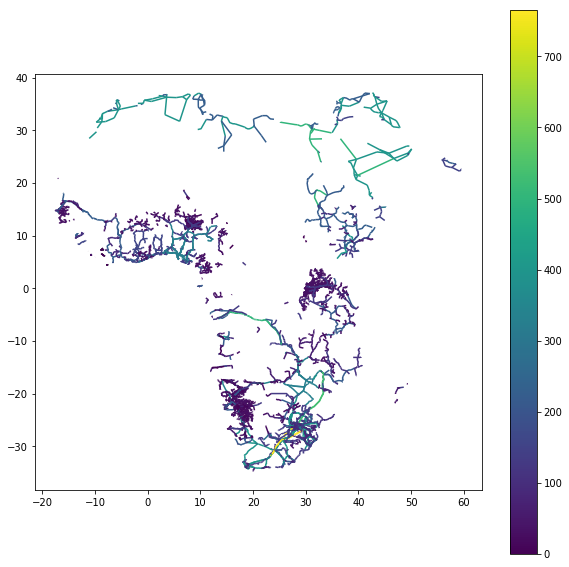

In [23]:
grid_exist_gp.plot(figsize=(10,10), column='voltage_kV', legend = True)

You can see some interesting trends here. First, most transmission lines above the Sahara have a higher voltage than those in Sub Saharan Africa. However, the line with the highest voltage looks to be in South Africa (can you see that small yellow line?) Infrastructure is lacking in Central Africa, where some of the poorest countries are. Let's now look at a map of the planned infrastructure, again color coding according to the `voltage_kV` column.

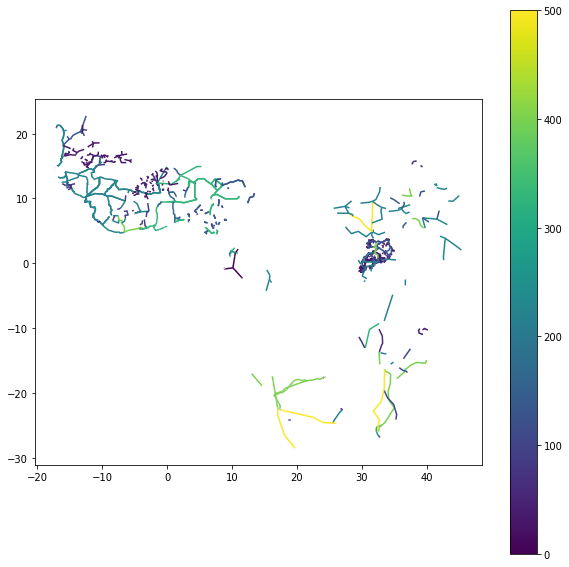

In [24]:
grid_planned_gp.plot(figsize=(10,10), column='voltage_kV', legend = True)

It does not look like there is infrastructure planned for Central Africa. Most plans are for West Africa, with a few high voltage lines planned in South Africa (and connected to neighboring countries) and some in East Africa. Something else you might notice here— the smaller lines are typically of lower voltage. 

This completes our analysis of voltage in this tutorial— congratulations!

## Access to Electricity Analysis

Next, we are going to look at a map with both EXISTING and PLANNED data and start thinking about electricity access in the continent. Instead of using the colors to depict voltage, it will now show the status of the line: existing, planned, construction or decommissioned. These last two categorgies have not been discussed previously as they represent such a small percentage of the dataset.

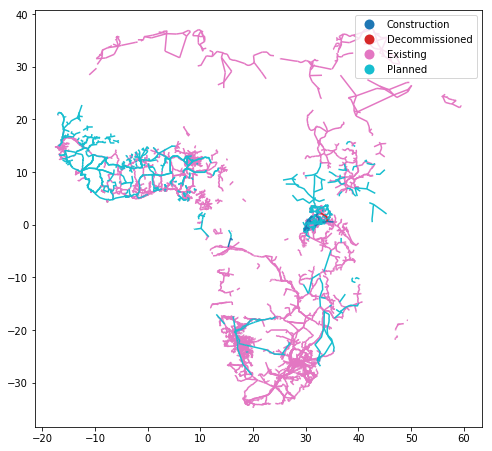

In [25]:
grid_concat_gp = pd.concat([grid_exist_gp,grid_planned_gp], axis=0)
grid_concat_gp.plot(figsize=(8,8), 
                    column='status', 
                    legend = True)

This map shows the whole picture. We can now compare and contrast the existing and planned infrastructure. The planned transmission lines look like they are connecting some of the existing infrastructure (see the planned lines in East Africa) as well as electrifying regions that previously were not connected. 

Let's now import our last dataset, the city population data, using pandas and the `pd.read_excel` function to see who is benefiting from these lines and who is left out.

In [31]:
pop_data = pd.read_excel (r'worldcities.xlsx')
print(pop_data.head())

          city   city_ascii      lat      lng country iso2 iso3   admin_name  \
0    Malishevë    Malisheve  42.4822  20.7458  Kosovo   XK  XKS    Malishevë   
1      Prizren      Prizren  42.2139  20.7397  Kosovo   XK  XKS      Prizren   
2  Zubin Potok  Zubin Potok  42.9144  20.6897  Kosovo   XK  XKS  Zubin Potok   
3     Kamenicë     Kamenice  42.5781  21.5803  Kosovo   XK  XKS     Kamenicë   
4         Viti         Viti  42.3214  21.3583  Kosovo   XK  XKS         Viti   

  capital  population          id  
0   admin         NaN  1901597212  
1   admin         NaN  1901360309  
2   admin         NaN  1901608808  
3   admin         NaN  1901851592  
4   admin         NaN  1901328795  


You'll notice that this dataset contains cities that are outside of Africa. However, for this analysis, we are only interested in African countries (and the neighboring countries that are connected to electricity grid infrastructure in Africa). We will narrow this dataset down to include only these countries and we will then convert the data to a GeoDataFrame in order to plot the cities with the size of the dots corresponding to population size.

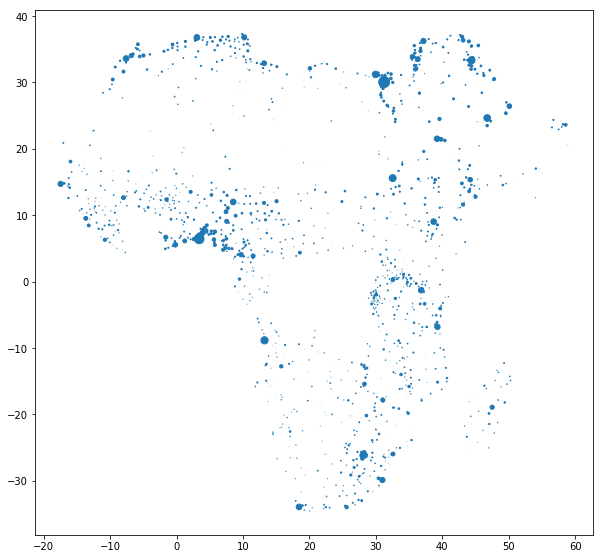

In [49]:
# Merge population dataset with voltage dataset so result only contains countries in Africa
pop_merge = pd.merge(country_volt_exist, pop_data, left_on='country', right_on='country', how = 'inner')

# Create required geometry list using lat and long points
geometry = [Point(xy) for xy in zip(pop_merge['lng'], pop_merge['lat'])]

# Create required crs component
crs = {'init': 'epsg:4326'}

# Create a GeoDataFrame
pop_geoframe = GeoDataFrame(pop_merge['population'], crs=crs, geometry=geometry)

# Plot with population scaled down so the map is legible
pop_geoframe.plot(figsize=(10,10), marker='o', markersize=pop_geoframe['population']/100000, legend = True)

# The strategy used to create the geometry list comes from: https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe

This is interesting, but what would be more interesting is if we were able to see if all populated cities had or will have electricity infrastructure according to the EXISTING and PLANNED datasets that we look at previously. Luckily, GeoPandas allows us to plot multiple layers at once.

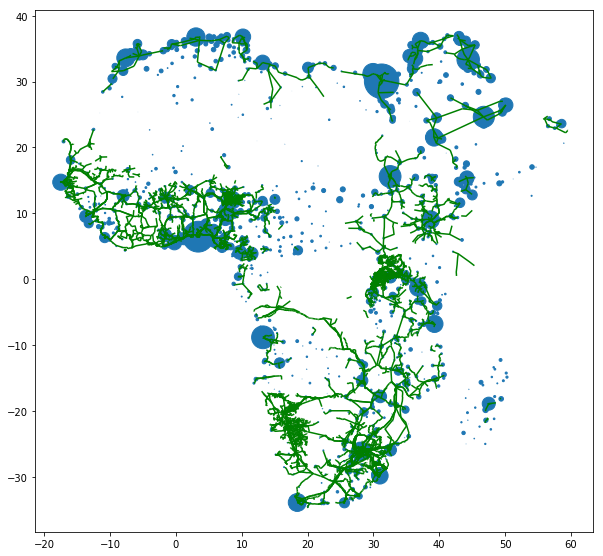

In [57]:
base = pop_geoframe.plot(figsize=(10,10), marker='o', markersize=pop_geoframe['population']/10000, legend = True)
grid_concat_gp.plot(figsize=(10,10),
                    ax = base,
                    color='green',
                    legend = True)

Pretty cool, right? You can clearly see how many of the transmission lines end or begin at or go through population centers. You can also see that some smaller cities throughout the continent are not connected to the grid. This is most apparent in Central Africa and in the Sahara. Even planned lines do not seem to reach all populated cities (this is where microgrids come in, but that's a topic for another time). This type of geographical analysis can help inform policy decisions as we can clearly see which cities need additional infrastructure and where the nearest connections are. GeoJSON and GeoPandas are so powerful!

# Summary and References

This tutorial has gone through the basics of the GeoJSON format, supplied you with tools on analyzing properties supplied in GeoJSON data, and shown you how to continue the analysis with GeoPandas. See these additional resources for even more information.

Library Information
1. GeoJSON: https://tools.ietf.org/html/rfc7946
2. GeoJSONio: https://pypi.org/project/geojsonio/
3. GeoPandas: http://geopandas.org
4. JSON: https://docs.python.org/3/library/json.html
5. Matplotlib: https://matplotlib.org
6. Pandas: https://pandas.pydata.org/pandas-docs/stable/
7. Shapely: https://pypi.org/project/Shapely/ 

Additional Information
8. Electricity Access: https://data.worldbank.org/indicator/eg.Elc.Accs.Zs
9. Africa Electricity Grids Explorer: http://africagrid.energydata.info